<a href="https://colab.research.google.com/github/UdaraChamidu/LangGraph/blob/main/single_node_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 8.4 MB/s eta 0:00:00


# Simple Graph

In [4]:
from typing import TypedDict

In [22]:
class AgentState(TypedDict):
    name: str
    age: int
    message: str

# differ than normal dictionary.
# keys can not change. initialized

In [23]:
# for a node, we give input name.
# it outputs that name with a greeting message
# lets create a node

# input of function-AgentState object
# output also AgentState

def hello(state: AgentState) -> AgentState:
    state['message'] = f"Hello {state['name']} ! Your age is {state['age']} ."
    return state

# name in the node is changed to name + greet
# this thing will be done by the node which we going to build

In [24]:
# create graph

from langgraph.graph import StateGraph, START, END

In [25]:
workflow = StateGraph(AgentState)

# name and what should do by node
workflow.add_node("hello", hello)

# go from start to hello node and hello node to end
workflow.add_edge(START, "hello")
workflow.add_edge("hello", END)

app = workflow.compile()

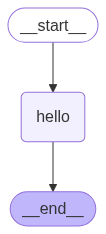

In [26]:
# visualize the graph

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
 # use the graph

result = app.invoke({"name" : "Udara", "age":25})
result['message']

'Hello Udara ! Your age is 25 .'